**Perbandingan Algoritma Regresi Linear dan RNN Terhadap Healthy Life Expectancy**

In [1]:
#!pip install leaflet

**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#from google.colab import files

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.layers import SimpleRNN
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences


**Import Dataset**

In [3]:
air = pd.read_csv("2019.csv")
#uploaded = files.upload()

**Read Dataset**

In [4]:
air = pd.read_csv('2019.csv')
air

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


**Drop Column Not Used**

In [5]:
air = air.drop(['Generosity','Country or region'],axis=1)

**Information Dataset**

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.7 KB


**Result Dataset**

In [7]:
air.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.298


**Check Data Null**

In [8]:
air.isna().sum()

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
dtype: int64

In [9]:
air2 = air.dropna(axis = 1)
air2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.7 KB


In [10]:
air2.isna().sum()

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
dtype: int64

**Heatmap**

<Axes: >

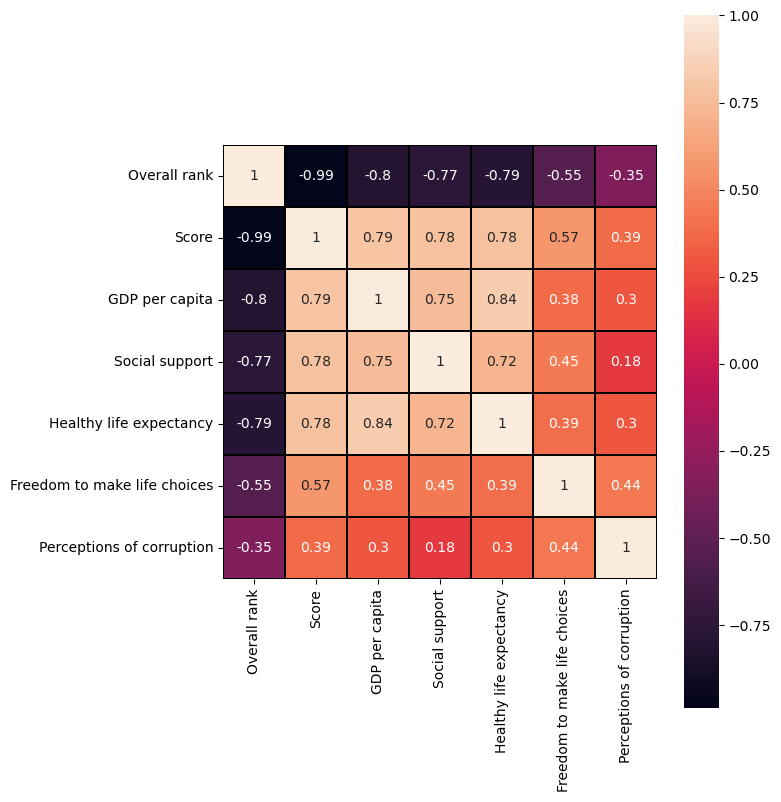

In [11]:
ax = plt.subplots(figsize=(7,9))
sns.heatmap(air.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, linecolor='black', annot=True)

**Visualization of Data Distribution**

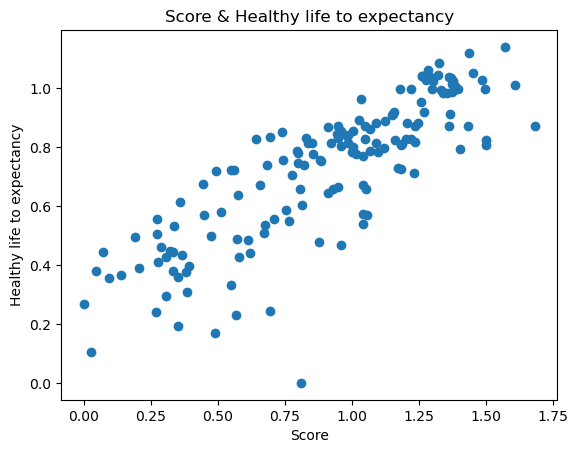

In [12]:
plt.scatter(air2['GDP per capita'], air2['Healthy life expectancy'])
plt.xlabel('Score')
plt.ylabel('Healthy life to expectancy')
plt.title('Score & Healthy life to expectancy')
plt.show()

**Spliting Dataset**

In [13]:
x = air2['GDP per capita'].values.reshape(-1,1)
y = air2['Healthy life expectancy'].values.reshape(-1,1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

**Print Split Dataset**

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(93, 1)
(63, 1)
(93, 1)
(63, 1)


**Fitting Model**

In [16]:
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)
LinReg.score(x_test, y_test)

0.7203258789111553

**Information Data After Spliting**

In [17]:
air2 = air.copy()
air2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.7 KB


**Visualization Linear Regression**

Text(0.5, 1.0, 'GDP Per Capita vs Healthy Life Expectancy')

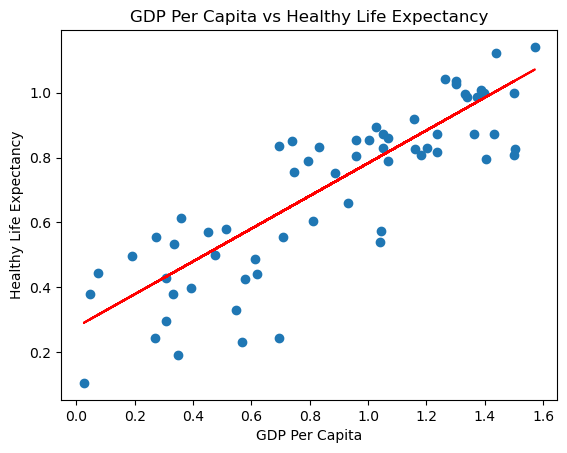

In [18]:
#Linear Regression
y_predict = LinReg.predict(x_test)
plt.scatter(x_test , y_test)
plt.plot(x_test, y_predict, c='r')
plt.xlabel('GDP Per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.title('GDP Per Capita vs Healthy Life Expectancy')

**Koefisien Determinasi**

In [19]:
#Mengukur Kecocokan Model
r2 = r2_score(y_test, y_predict)
print ('R2 Score: ', r2)

R2 Score:  0.7203258789111553


**Mean Absolute Error (MAE)**

In [20]:
mae = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.10990893394768018


**Simple Recurrent Neural Network (RNN)**

In [21]:
#Read Dataset
air = pd.read_csv('2019.csv')
air.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
air = air.drop(['Generosity'],axis=1)

**Information Dataset After Drop Variabel That Not Using**

In [23]:
#Check Dataset
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.9+ KB


**Drop Null on Data**

In [24]:
#Check Null
air = air.dropna()
air.shape

(156, 8)

In [25]:
#check Different labels for Sentiment
Mood = air.value_counts()

**Transform Tweet Data into List and Tokenize**

In [26]:
#Transform to List
text = air["Country or region"].tolist()
print(text[:10])

#Tokenize
token = Tokenizer()
token.fit_on_texts(text)
print(token.index_word)

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria']
{1: 'united', 2: 'republic', 3: 'south', 4: 'cyprus', 5: 'congo', 6: 'finland', 7: 'denmark', 8: 'norway', 9: 'iceland', 10: 'netherlands', 11: 'switzerland', 12: 'sweden', 13: 'new', 14: 'zealand', 15: 'canada', 16: 'austria', 17: 'australia', 18: 'costa', 19: 'rica', 20: 'israel', 21: 'luxembourg', 22: 'kingdom', 23: 'ireland', 24: 'germany', 25: 'belgium', 26: 'states', 27: 'czech', 28: 'arab', 29: 'emirates', 30: 'malta', 31: 'mexico', 32: 'france', 33: 'taiwan', 34: 'chile', 35: 'guatemala', 36: 'saudi', 37: 'arabia', 38: 'qatar', 39: 'spain', 40: 'panama', 41: 'brazil', 42: 'uruguay', 43: 'singapore', 44: 'el', 45: 'salvador', 46: 'italy', 47: 'bahrain', 48: 'slovakia', 49: 'trinidad', 50: 'tobago', 51: 'poland', 52: 'uzbekistan', 53: 'lithuania', 54: 'colombia', 55: 'slovenia', 56: 'nicaragua', 57: 'kosovo', 58: 'argentina', 59: 'romania', 60: 'ecuador', 61: 'k

**Print Result Tokenize**

In [27]:
#Print Encoded Text
encode_text = token.texts_to_sequences(air)

#define max word and padding
max_word = 160
X = pad_sequences(encode_text, maxlen = max_word, padding = "post")
print(X)

#check how many vocab used
n = len(token.index_word)+1
print("\nIndex Count:", n)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Index Count: 177


**Define The Variabel**

In [28]:
df = air["Healthy life expectancy"]

**Spliting Dataset**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 999, test_size = 0.4)

In [30]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [31]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(93, 1)
(63, 1)
(93, 1)
(63, 1)


**Change Label to Represesntation One-Hot Encoding**

In [32]:
#Representation Biner
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

**Modelling Recurrent Neural Network (RNN)**

In [33]:
#Train Dataset Using Model RNN
emb_vec_len = 100
vec_size = 9999
model = Sequential()
model.add(Embedding(n, vec_size, input_length=max_word))
model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dense(units=32, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 9999)         1769823   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                644096    
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

**Fitting Dataset**

In [34]:
#Test Dataset
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Testing Dataset**

In [35]:
#Test Dataset using model.fit
model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
3/3 [==============================] - 6s 319ms/step - loss: 1.1050 - accuracy: 0.1290 - val_loss: 1.0893 - val_accuracy: 0.6667
Epoch 2/50
3/3 [==============================] - 0s 64ms/step - loss: 1.0920 - accuracy: 0.3118 - val_loss: 1.0824 - val_accuracy: 0.8730
Epoch 3/50
3/3 [==============================] - 0s 63ms/step - loss: 1.0800 - accuracy: 0.6237 - val_loss: 1.0739 - val_accuracy: 0.8730
Epoch 4/50
3/3 [==============================] - 0s 63ms/step - loss: 1.0689 - accuracy: 0.7419 - val_loss: 1.0630 - val_accuracy: 0.8730
Epoch 5/50
3/3 [==============================] - 0s 53ms/step - loss: 1.0591 - accuracy: 0.7527 - val_loss: 1.0477 - val_accuracy: 0.8730
Epoch 6/50
3/3 [==============================] - 0s 59ms/step - loss: 1.0440 - accuracy: 0.7097 - val_loss: 1.0305 - val_accuracy: 0.8730
Epoch 7/50
3/3 [==============================] - 0s 66ms/step - loss: 1.0242 - accuracy: 0.7742 - val_loss: 1.0089 - val_accuracy: 0.8730
Epoch 8/50
3/3 [==========

**Summary The Model**

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 9999)         1769823   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                644096    
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

**Evaluate Model**

In [37]:
# Melakukan Evaluasi Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2/2 [==============================] - 0s 19ms/step - loss: 0.3201 - accuracy: 0.8730
Loss: 0.3201170861721039, Accuracy: 0.8730158805847168


### Deployment

In [38]:
#dataset untuk melakukan deploy 
air2.head(10)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.298
5,6,7.480,1.452,1.526,1.052,0.572,0.343
6,7,7.343,1.387,1.487,1.009,0.574,0.373
7,8,7.307,1.303,1.557,1.026,0.585,0.380
8,9,7.278,1.365,1.505,1.039,0.584,0.308
9,10,7.246,1.376,1.475,1.016,0.532,0.226


In [39]:
air2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.7 KB


In [40]:
air2['Score'] = air2['Score'].astype(float).apply(lambda x: str(x).replace('.', ''))
air2['GDP per capita'] = air2['GDP per capita'].astype(float).apply(lambda x: str(x).replace('.', ''))
air2['Social support'] = air2['Social support'].astype(float).apply(lambda x: str(x).replace('.', ''))
air2['Healthy life expectancy'] = air2['Healthy life expectancy'].astype(float).apply(lambda x: str(x).replace('.', ''))
air2['Freedom to make life choices'] = air2['Freedom to make life choices'].astype(float).apply(lambda x: str(x).replace('.', ''))
air2['Perceptions of corruption'] = air2['Perceptions of corruption'].astype(float).apply(lambda x: str(x).replace('.', ''))

In [41]:
air2.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1,7769,134,1587,0986,0596,0393
1,2,76,1383,1573,0996,0592,041
2,3,7554,1488,1582,1028,0603,0341
3,4,7494,138,1624,1026,0591,0118
4,5,7488,1396,1522,0999,0557,0298


In [42]:
air2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Overall rank                  156 non-null    int64 
 1   Score                         156 non-null    object
 2   GDP per capita                156 non-null    object
 3   Social support                156 non-null    object
 4   Healthy life expectancy       156 non-null    object
 5   Freedom to make life choices  156 non-null    object
 6   Perceptions of corruption     156 non-null    object
dtypes: int64(1), object(6)
memory usage: 8.7+ KB


In [57]:
air2['Score'] = pd.to_numeric(air2['Score'], errors='coerce').astype(int)
air2['GDP per capita'] = pd.to_numeric(air2['GDP per capita'], errors='coerce').astype(int)
air2['Social support'] = pd.to_numeric(air2['Social support'], errors='coerce').astype(int)
air2['Healthy life expectancy'] = pd.to_numeric(air2['Healthy life expectancy'], errors='coerce').astype(int)
air2['Freedom to make life choices'] = pd.to_numeric(air2['Freedom to make life choices'], errors='coerce').astype(int)
air2['Perceptions of corruption'] = pd.to_numeric(air2['Perceptions of corruption'], errors='coerce').astype(int)

In [58]:
air2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Overall rank                  156 non-null    int64
 1   Score                         156 non-null    int32
 2   GDP per capita                156 non-null    int32
 3   Social support                156 non-null    int32
 4   Healthy life expectancy       156 non-null    int32
 5   Freedom to make life choices  156 non-null    int32
 6   Perceptions of corruption     156 non-null    int32
dtypes: int32(6), int64(1)
memory usage: 5.0 KB


In [59]:
air2.head(10)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1,7769,134,1587,986,596,393
1,2,76,1383,1573,996,592,41
2,3,7554,1488,1582,1028,603,341
3,4,7494,138,1624,1026,591,118
4,5,7488,1396,1522,999,557,298
5,6,748,1452,1526,1052,572,343
6,7,7343,1387,1487,1009,574,373
7,8,7307,1303,1557,1026,585,38
8,9,7278,1365,1505,1039,584,308
9,10,7246,1376,1475,1016,532,226


In [45]:
#pip install pickle - mixin

In [64]:
import pickle

In [65]:
filename = 'gdp.sav'
pickle.dump(LinReg, open(filename, 'wb'))

In [66]:
loaded_model = pickle.load(open('gdp.sav', 'rb'))

In [67]:
input_data = (1, 7769, 1340, 1587, 986, 596, 393)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(-1, 1)

prediction = LinReg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('GDP mempengaruhi harapan hidup sehat')
else :
  print('GDP tidak mempengaruhi harapan hidup sehat')

[[7.82560209e-01]
 [3.92414531e+03]
 [6.77067669e+02]
 [8.01819291e+02]
 [4.98273846e+02]
 [3.01297601e+02]
 [1.98768940e+02]]
GDP tidak mempengaruhi harapan hidup sehat


streamlit run "C:\Users\stanl\Tugas Kuli\Datmod\UAS\GDPPredictionWebApp.py"

#### 

In [43]:
print(air2.dtypes)

Overall rank                     int64
Score                           object
GDP per capita                  object
Social support                  object
Healthy life expectancy         object
Freedom to make life choices    object
Perceptions of corruption       object
dtype: object


In [44]:
air2.head(10)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1,7769,134,1587,0986,0596,0393
1,2,76,1383,1573,0996,0592,041
2,3,7554,1488,1582,1028,0603,0341
3,4,7494,138,1624,1026,0591,0118
4,5,7488,1396,1522,0999,0557,0298
5,6,748,1452,1526,1052,0572,0343
6,7,7343,1387,1487,1009,0574,0373
7,8,7307,1303,1557,1026,0585,038
8,9,7278,1365,1505,1039,0584,0308
9,10,7246,1376,1475,1016,0532,0226
